# Imports

In [1]:
!pip install pytorch-lightning torchvision --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 61.2 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle
# hongdcs/pokemon-gen1-151-classes-classification
!kaggle datasets download -d hongdcs/pokemon-gen1-151-classes-classification
!unzip -q pokemon-gen1-151-classes-classification.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/hongdcs/pokemon-gen1-151-classes-classification
License(s): CC0-1.0
 99% 2.45G/2.47G [00:23<00:00, 260MB/s]
100% 2.47G/2.47G [00:23<00:00, 111MB/s]


In [3]:
import os
import pandas as pd

# Base path to your dataset
base_path = '/content/pkm_c_aug_new'

# Create list to store image paths and labels
data = []

# Traverse subfolders (each folder is a class label)
for label in os.listdir(base_path):
    label_folder = os.path.join(base_path, label)
    if os.path.isdir(label_folder):
        for img_file in os.listdir(label_folder):
            if img_file.endswith('.png'):
                img_path = os.path.join(label_folder, img_file)
                data.append({'image_path': img_path, 'label': label})

# Create DataFrame
df = pd.DataFrame(data)

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
df.head()

image_path   label
0  /content/pkm_c_aug_new/Pidgey/15_0_8480.png  Pidgey
1   /content/pkm_c_aug_new/Pidgey/15_0_858.png  Pidgey
2     /content/pkm_c_aug_new/Pidgey/img_27.png  Pidgey
3     /content/pkm_c_aug_new/Pidgey/img_20.png  Pidgey
4  /content/pkm_c_aug_new/Pidgey/15_0_9548.png  Pidgey

In [ ]:
print("Total images:", len(df))
print("Number of unique classes:", df['label'].nunique())
print("Class names:", df['label'].unique())


Total images: 15080
Number of unique classes: 151
Class names: ['Pidgey' 'Spearow' 'Dragonite' 'Poliwag' 'Aerodactyl' 'Ninetales'
 'Marowak' 'Poliwhirl' 'Chansey' 'Jolteon' 'Pinsir' 'Dewgong' 'Bulbasaur'
 'Shellder' 'Hitmonchan' 'Beedrill' 'Eevee' 'Psyduck' 'Diglett' 'Nidoking'
 'Caterpie' 'Nidoqueen' 'Wartortle' 'Ditto' 'Magmar' 'Nidoran_male'
 'Butterfree' 'Magnemite' 'Tentacruel' 'Voltorb' 'Sandslash' 'Nidorina'
 'Flareon' 'Omanyte' 'Grimer' 'Oddish' 'Dodrio' 'Zapdos' 'Mankey'
 'Raticate' 'Electabuzz' 'Mew' 'Pidgeotto' 'Ivysaur' 'Haunter' 'Slowpoke'
 'Rapidash' 'Tangela' 'Clefairy' 'Krabby' 'Kadabra' 'Rhydon' 'Porygon'
 'Doduo' 'Gengar' 'Machamp' 'Kabuto' 'Dratini' 'Weedle' 'Moltres'
 'Charizard' 'Jynx' 'Clefable' 'Lickitung' 'Arbok' 'Alakazam' 'Staryu'
 'Hypno' 'Dragonair' 'Gyarados' 'Farfetchd' 'Kingler' 'Magikarp' 'Cubone'
 'Machop' 'Vulpix' 'Rattata' 'Weezing' 'Geodude' 'Charmeleon' 'Exeggcute'
 'Jigglypuff' 'Machoke' 'Lapras' 'Venonat' 'Gastly' 'Mewtwo' 'Magneton'
 'Vaporeon' '

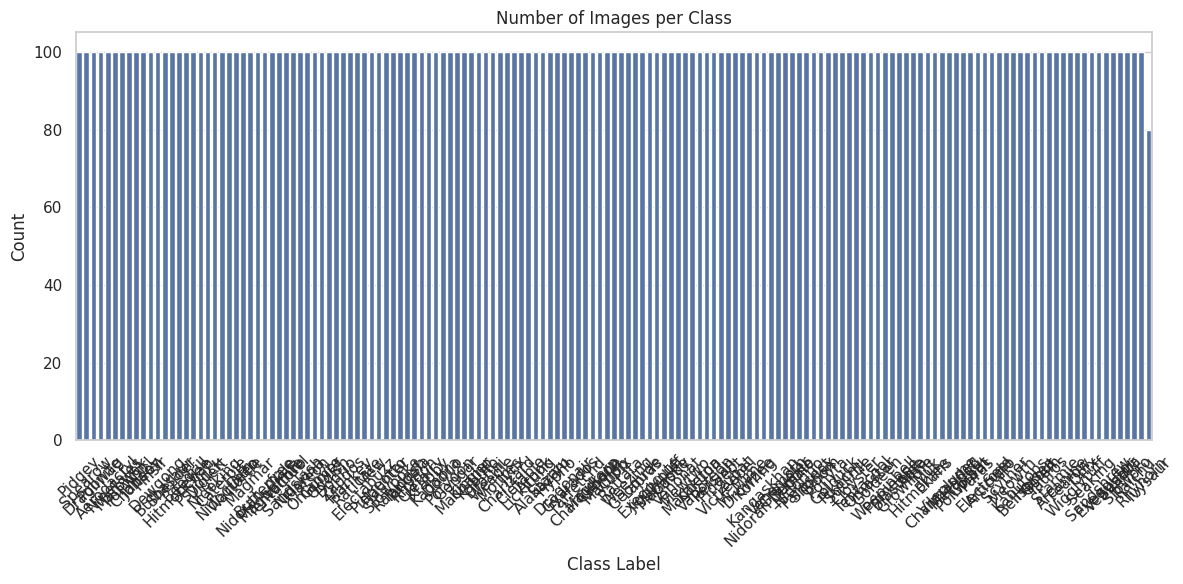

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Images per Class")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


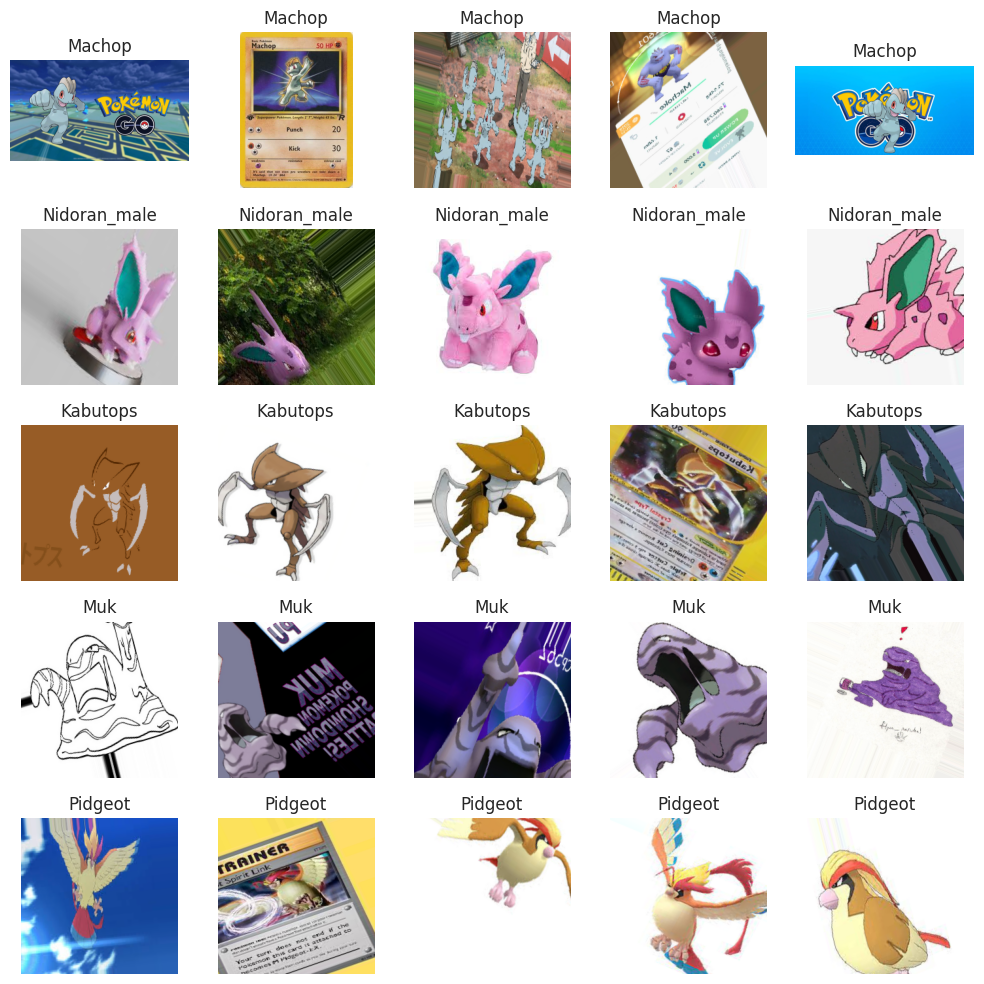

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_images_per_class(df, num_classes=5, images_per_class=5):
    classes = df['label'].unique()
    selected_classes = random.sample(list(classes), min(num_classes, len(classes)))

    plt.figure(figsize=(images_per_class * 2, num_classes * 2))

    for row, cls in enumerate(selected_classes):
        subset = df[df['label'] == cls]
        chosen_imgs = subset.sample(n=min(images_per_class, len(subset)))

        for col, (_, row_data) in enumerate(chosen_imgs.iterrows()):
            img = mpimg.imread(row_data['image_path'])
            plt.subplot(num_classes, images_per_class, row * images_per_class + col + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Show 5 images from 5 random classes
show_images_per_class(df, num_classes=5, images_per_class=5)


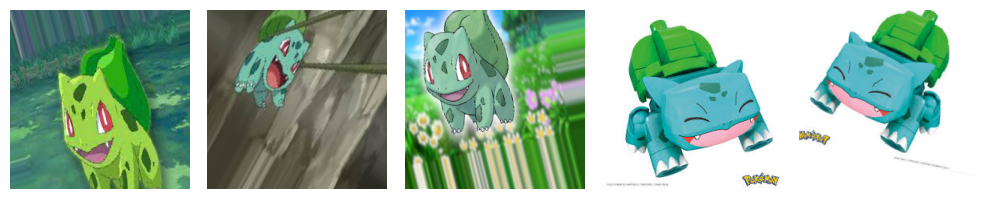

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_clean_texture_strip(df, class_name, num_images=5):
    # Filter images of that class
    images = df[df['label'] == class_name].sample(n=min(num_images, len(df[df['label'] == class_name])))

    # Set figure size
    plt.figure(figsize=(num_images * 2.5, 2.5))

    for i, path in enumerate(images['image_path']):
        img = mpimg.imread(path)
        ax = plt.subplot(1, num_images, i + 1)
        ax.imshow(img)
        ax.axis('off')  # no ticks, no frame

    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.show()

# Example usage:
plot_clean_texture_strip(df, class_name='Bulbasaur', num_images=5)


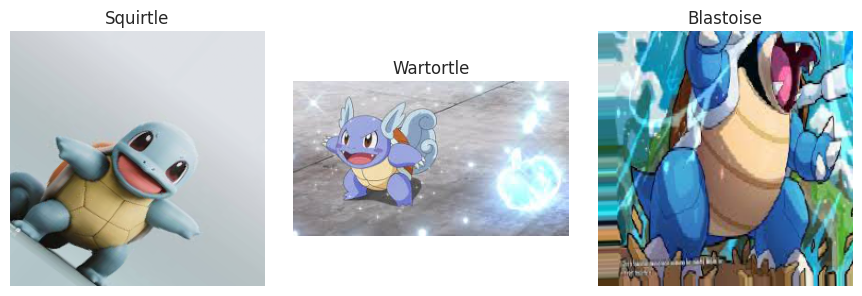

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_pokemon_evolution(df, evolution_chain):
    num_evolutions = len(evolution_chain)
    plt.figure(figsize=(num_evolutions * 3, 3))

    for i, name in enumerate(evolution_chain):
        # Pick one image randomly from each class
        img_path = df[df['label'] == name].sample(1)['image_path'].values[0]
        img = mpimg.imread(img_path)

        ax = plt.subplot(1, num_evolutions, i + 1)
        ax.imshow(img)
        ax.set_title(name, fontsize=12)
        ax.axis('off')

    plt.tight_layout()
    plt.show()
plot_pokemon_evolution(df, ['Squirtle', 'Wartortle', 'Blastoise'])


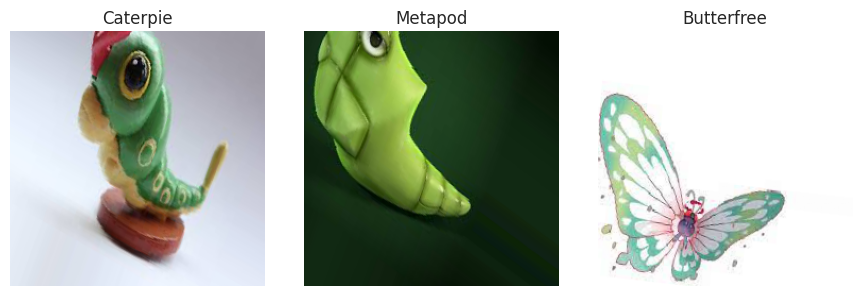

In [ ]:
plot_pokemon_evolution(df, ['Caterpie', 'Metapod', 'Butterfree'])


# img size exploration

Most common image sizes:
(240, 240): 12264 images
(1280, 720): 144 images
(225, 225): 136 images
(300, 168): 54 images
(1920, 1080): 48 images
(734, 1024): 36 images
(500, 500): 35 images
(646, 646): 35 images
(600, 600): 34 images
(600, 825): 34 images


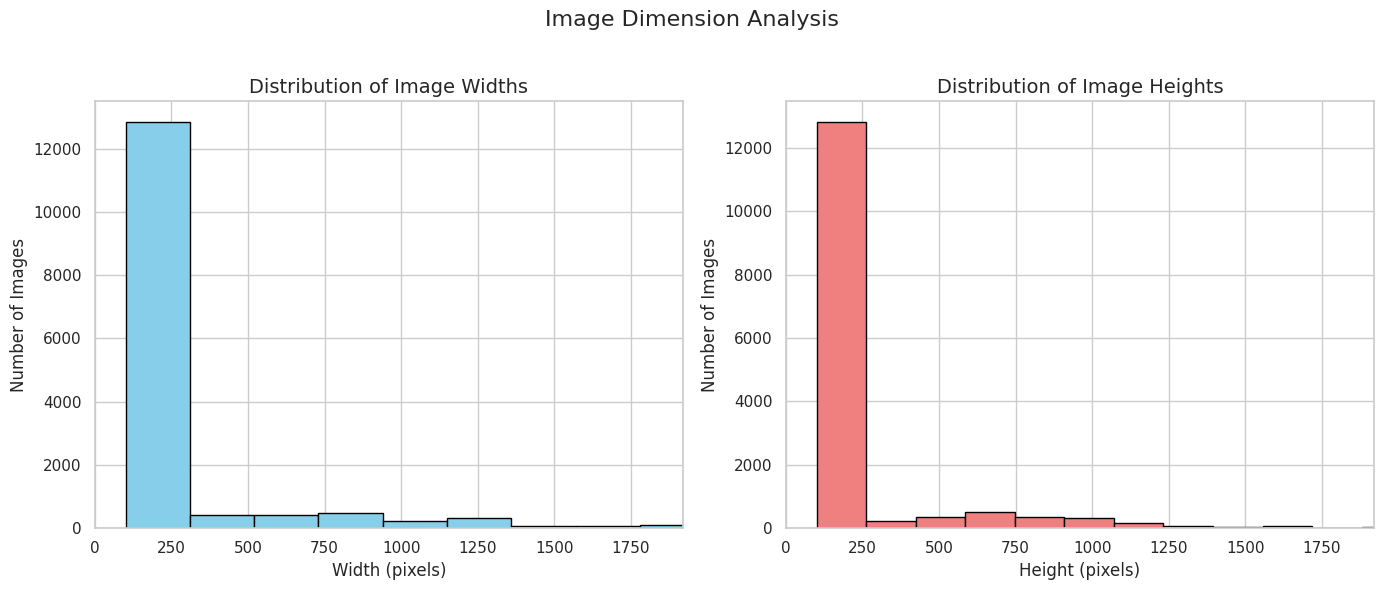

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Extract sizes from your existing df
sizes = []
for path in df['image_path']:
    try:
        with Image.open(path) as img:
            sizes.append(img.size)  # (width, height)
    except:
        print(f"Failed to open: {path}")

# Count and print most common sizes
size_counts = Counter(sizes)
print("Most common image sizes:")
for size, count in size_counts.most_common(10):
    print(f"{size}: {count} images")

# Separate width and height
widths, heights = zip(*sizes)

# Plot using seaborn styling
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Widths
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
plt.xlim(0, 1920)
plt.title("Distribution of Image Widths", fontsize=14)
plt.xlabel("Width (pixels)", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)

# Heights
plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='lightcoral', edgecolor='black')
plt.xlim(0, 1920)
plt.title("Distribution of Image Heights", fontsize=14)
plt.xlabel("Height (pixels)", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)

plt.suptitle("Image Dimension Analysis", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Preprocessing

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# === SPLIT THE DATA ===
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

print(f"Train: {len(train_df)} images")
print(f"Validation: {len(val_df)} images")
print(f"Test: {len(test_df)} images")

Train: 10556 images
Validation: 2262 images
Test: 2262 images


#data set and loaders

In [5]:
from torchvision import transforms
from PIL import Image
import torch
from torch.utils.data import Dataset

class PokemonDataset(Dataset):
    def __init__(self, dataframe, label_encoder, transform=None):
        self.data = dataframe.reset_index(drop=True)
        self.transform = transform
        self.label_encoder = label_encoder

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = self.data.loc[idx, 'image_path']
        label = self.data.loc[idx, 'label']
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label_idx = self.label_encoder[label]
        return image, label_idx


In [6]:
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader

img_size = 240
batch_size = 64

transform_train = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

transform_test = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor()
])

# Label encoding
le = LabelEncoder()
le.fit(df['label'])
label_map = dict(zip(le.classes_, le.transform(le.classes_)))

# Datasets
train_ds = PokemonDataset(train_df, label_map, transform=transform_train)
val_ds   = PokemonDataset(val_df, label_map, transform=transform_test)
test_ds  = PokemonDataset(test_df, label_map, transform=transform_test)

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)


In [7]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 1. For ViT, use img_size=224 as required!
vit_img_size = 224
vit_batch_size = 64

vit_transform_train = transforms.Compose([
    transforms.Resize((vit_img_size, vit_img_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

vit_transform_test = transforms.Compose([
    transforms.Resize((vit_img_size, vit_img_size)),
    transforms.ToTensor()
])

# 2. Datasets (don't overwrite your main ones, use _vit)
train_ds_vit = PokemonDataset(train_df, label_map, transform=vit_transform_train)
val_ds_vit   = PokemonDataset(val_df,   label_map, transform=vit_transform_test)
test_ds_vit  = PokemonDataset(test_df,  label_map, transform=vit_transform_test)

# 3. DataLoaders (new names)
train_loader_vit = DataLoader(train_ds_vit, batch_size=vit_batch_size, shuffle=True)
val_loader_vit   = DataLoader(val_ds_vit,   batch_size=vit_batch_size, shuffle=False)
test_loader_vit  = DataLoader(test_ds_vit,  batch_size=vit_batch_size, shuffle=False)


# explainability codes

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

def apply_colormap_on_image(org_im, activation, colormap_name='jet'):
    color_map = plt.get_cmap(colormap_name)
    no_trans_heatmap = color_map(activation)
    heatmap = no_trans_heatmap[..., :3]
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
    heatmap = cv2.resize(heatmap, (org_im.shape[1], org_im.shape[0]))
    superimposed_img = heatmap * 0.4 + org_im
    superimposed_img = np.uint8(superimposed_img)
    return superimposed_img

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):

        def forward_hook(module, input, output):
            self.activations = output.detach()
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()
        self.target_layer.register_forward_hook(forward_hook)

        try:
            self.target_layer.register_full_backward_hook(backward_hook)
        except AttributeError:
            self.target_layer.register_backward_hook(backward_hook)


    def __call__(self, input_tensor, class_idx=None):
        self.model.zero_grad()
        output = self.model(input_tensor)
        if class_idx is None:
            class_idx = torch.argmax(output, dim=1).item()
        loss = output[0, class_idx]
        loss.backward()
        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations[0]
        for i in range(len(pooled_gradients)):
            activations[i, ...] *= pooled_gradients[i]
        heatmap = torch.mean(activations, dim=0).cpu().numpy()
        heatmap = np.maximum(heatmap, 0)
        heatmap = heatmap / (heatmap.max() + 1e-10)
        return heatmap





In [9]:
def visualize_gradcam(model, dataloader, class_names, explain_dir, num_examples=5):
    model.eval()
    device = next(model.parameters()).device
    # Find the last Conv2d in the sequential model
    target_layer = None
    for module in reversed(list(model.model.children())):
        if isinstance(module, torch.nn.Conv2d):
            target_layer = module
            break
    if target_layer is None:
        raise ValueError("No Conv2d layer found for Grad-CAM")
    gradcam = GradCAM(model, target_layer)
    os.makedirs(explain_dir, exist_ok=True)
    count = 0
    for batch in dataloader:
        images, labels = batch
        images = images.to(device)
        for i in range(images.size(0)):
            input_tensor = images[i].unsqueeze(0)
            heatmap = gradcam(input_tensor)
            # Convert input tensor to numpy image
            img_np = input_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()
            img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min() + 1e-6)  # normalize
            img_np = np.uint8(255 * img_np)
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
            cam_img = apply_colormap_on_image(img_np, heatmap)
            pred_class = class_names[torch.argmax(model(input_tensor), dim=1).item()]
            true_class = class_names[labels[i].item()]
            # === New: Side-by-side plot ===
            fig, axes = plt.subplots(1, 2, figsize=(10, 6))
            axes[0].imshow(img_np[..., ::-1])  # Original (BGR->RGB)
            axes[0].set_title("Original Image")
            axes[0].axis('off')
            axes[1].imshow(cam_img[..., ::-1])  # Grad-CAM
            axes[1].set_title(f"Grad-CAM\nTrue: {true_class}, Pred: {pred_class}")
            axes[1].axis('off')
            plt.tight_layout()
            save_path = os.path.join(
                explain_dir,
                f"gradcam_{count}_true_{true_class}_pred_{pred_class}.png"
            )
            plt.savefig(save_path)
            plt.close()
            count += 1
            if count >= num_examples:
                return

In [10]:
def visualize_gradcam_modern(model, dataloader, class_names, explain_dir, num_examples=5):
    model.eval()
    device = next(model.parameters()).device
    # Find the last Conv2d in the features block
    target_layer = None
    for module in reversed(list(model.features.children())):
        if isinstance(module, torch.nn.Conv2d):
            target_layer = module
            break
    if target_layer is None:
        raise ValueError("No Conv2d layer found for Grad-CAM")
    gradcam = GradCAM(model, target_layer)
    os.makedirs(explain_dir, exist_ok=True)
    count = 0
    for batch in dataloader:
        images, labels = batch
        images = images.to(device)
        for i in range(images.size(0)):
            input_tensor = images[i].unsqueeze(0)
            heatmap = gradcam(input_tensor)
            img_np = input_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()
            img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min() + 1e-6)
            img_np = np.uint8(255 * img_np)
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
            cam_img = apply_colormap_on_image(img_np, heatmap)
            pred_class = class_names[torch.argmax(model(input_tensor), dim=1).item()]
            true_class = class_names[labels[i].item()]
            # Side-by-side plot
            fig, axes = plt.subplots(1, 2, figsize=(10, 6))
            axes[0].imshow(img_np[..., ::-1])
            axes[0].set_title("Original Image")
            axes[0].axis('off')
            axes[1].imshow(cam_img[..., ::-1])
            axes[1].set_title(f"Grad-CAM\nTrue: {true_class}, Pred: {pred_class}")
            axes[1].axis('off')
            plt.tight_layout()
            save_path = os.path.join(
                explain_dir,
                f"gradcam_{count}_true_{true_class}_pred_{pred_class}.png"
            )
            plt.savefig(save_path)
            plt.close()
            count += 1
            if count >= num_examples:
                return




In [11]:
def visualize_gradcam_convmixer(model, dataloader, class_names, explain_dir, num_examples=5):
    model.eval()
    device = next(model.parameters()).device

    # Find the last Conv2d layer in the blocks
    target_layer = None
    for module in reversed(list(model.blocks.children())):
        if isinstance(module, ConvMixerBlock):
            # Look for the last Conv2d (depthwise or pointwise) in the block
            if hasattr(module, 'depthwise'):
                target_layer = module.depthwise
                break
            elif hasattr(module, 'pointwise'):
                target_layer = module.pointwise
                break
    if target_layer is None:
        raise ValueError("No Conv2d layer found for Grad-CAM in ConvMixer")

    gradcam = GradCAM(model, target_layer)
    os.makedirs(explain_dir, exist_ok=True)
    count = 0
    for batch in dataloader:
        images, labels = batch
        images = images.to(device)
        for i in range(images.size(0)):
            input_tensor = images[i].unsqueeze(0)
            heatmap = gradcam(input_tensor)
            img_np = input_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()
            img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min() + 1e-6)
            img_np = np.uint8(255 * img_np)
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
            cam_img = apply_colormap_on_image(img_np, heatmap)
            pred_class = class_names[torch.argmax(model(input_tensor), dim=1).item()]
            true_class = class_names[labels[i].item()]
            fig, axes = plt.subplots(1, 2, figsize=(10, 6))
            axes[0].imshow(img_np[..., ::-1])
            axes[0].set_title("Original Image")
            axes[0].axis('off')
            axes[1].imshow(cam_img[..., ::-1])
            axes[1].set_title(f"Grad-CAM\nTrue: {true_class}, Pred: {pred_class}")
            axes[1].axis('off')
            plt.tight_layout()
            save_path = os.path.join(
                explain_dir,
                f"gradcam_{count}_true_{true_class}_pred_{pred_class}.png"
            )
            plt.savefig(save_path)
            plt.close()
            count += 1
            if count >= num_examples:
                return

In [12]:
def visualize_gradcam_resnet18(model, dataloader, class_names, explain_dir, num_examples=5):
    model.eval()
    device = next(model.parameters()).device
    # For torchvision resnet18, the last conv layer is model.resnet.layer4[-1].conv2
    target_layer = model.resnet.layer4[-1].conv2
    gradcam = GradCAM(model, target_layer)
    os.makedirs(explain_dir, exist_ok=True)
    count = 0
    for batch in dataloader:
        images, labels = batch
        images = images.to(device)
        for i in range(images.size(0)):
            input_tensor = images[i].unsqueeze(0)
            heatmap = gradcam(input_tensor)
            img_np = input_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()
            img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min() + 1e-6)
            img_np = np.uint8(255 * img_np)
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
            cam_img = apply_colormap_on_image(img_np, heatmap)
            pred_class = class_names[torch.argmax(model(input_tensor), dim=1).item()]
            true_class = class_names[labels[i].item()]
            # Side-by-side plot
            fig, axes = plt.subplots(1, 2, figsize=(10, 6))
            axes[0].imshow(img_np[..., ::-1])
            axes[0].set_title("Original Image")
            axes[0].axis('off')
            axes[1].imshow(cam_img[..., ::-1])
            axes[1].set_title(f"Grad-CAM\nTrue: {true_class}, Pred: {pred_class}")
            axes[1].axis('off')
            plt.tight_layout()
            save_path = os.path.join(
                explain_dir,
                f"gradcam_{count}_true_{true_class}_pred_{pred_class}.png"
            )
            plt.savefig(save_path)
            plt.close()
            count += 1
            if count >= num_examples:
                return


In [13]:
import matplotlib.pyplot as plt
import torch
import os
import numpy as np
import cv2

def visualize_vit_attention(model, dataloader, class_names, explain_dir, num_examples=5):
    model.eval()
    device = next(model.parameters()).device
    os.makedirs(explain_dir, exist_ok=True)
    count = 0

    for batch in dataloader:
        images, labels = batch
        images = images.to(device)
        for i in range(images.size(0)):
            input_tensor = images[i].unsqueeze(0)
            vit_attn_maps.clear()
            with torch.no_grad():
                output = model.vit(input_tensor)
            attentions = vit_attn_maps[0]  # This is now either [heads, tokens, tokens] or [batch, heads, tokens, tokens]

            # --- NEW: Auto-adapt to shape ---
            if attentions.dim() == 4:
                # [batch, heads, tokens, tokens]
                attn = attentions[0, :, 0, 1:].mean(0).numpy()
            elif attentions.dim() == 3:
                # [heads, tokens, tokens]
                attn = attentions[:, 0, 1:].mean(0).numpy()
            else:
                raise ValueError(f"Unexpected attention shape: {attentions.shape}")
            # --------------------------------

            num_patches = int(attn.shape[0] ** 0.5)
            attn_map = attn.reshape(num_patches, num_patches)
            attn_map = cv2.resize(attn_map, (input_tensor.shape[2], input_tensor.shape[3]))
            attn_map = (attn_map - attn_map.min()) / (attn_map.max() - attn_map.min() + 1e-6)

            img_np = input_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()
            img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min() + 1e-6)
            img_np = np.uint8(255 * img_np)
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

            heatmap = cv2.applyColorMap(np.uint8(255 * attn_map), cv2.COLORMAP_JET)
            overlay = cv2.addWeighted(img_np, 0.6, heatmap, 0.4, 0)

            pred_class = class_names[torch.argmax(model(input_tensor), dim=1).item()]
            true_class = class_names[labels[i].item()]

            fig, axes = plt.subplots(1, 2, figsize=(10, 6))
            axes[0].imshow(img_np[..., ::-1])
            axes[0].set_title("Original Image")
            axes[0].axis('off')
            axes[1].imshow(overlay[..., ::-1])
            axes[1].set_title(f"ViT Attention\nTrue: {true_class}, Pred: {pred_class}")
            axes[1].axis('off')
            plt.tight_layout()
            save_path = os.path.join(
                explain_dir,
                f"vit_attention_{count}_true_{true_class}_pred_{pred_class}.png"
            )
            plt.savefig(save_path)
            plt.close()
            count += 1
            if count >= num_examples:
                return


In [14]:
import glob
import re

def get_latest_expdir(model_name):
    ckpt_base = f"/content/checkpoints/{model_name}/"
    subdirs = [d for d in glob.glob(os.path.join(ckpt_base, '*')) if os.path.isdir(d)]
    # Sort by timestamp in folder name (YYYYMMDD-HHMMSS)
    subdirs = sorted(subdirs, key=lambda s: re.findall(r'\d{8}-\d{6}', s)[0] if re.findall(r'\d{8}-\d{6}', s) else '', reverse=True)
    return subdirs[0] if subdirs else None

In [15]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import os

def explain_xgb_classifier(classifier, X_train, X_test, model_name, base_dir, num_shap=1, top_n_feat=20):
    explain_dir = os.path.join(base_dir, "explanations")
    os.makedirs(explain_dir, exist_ok=True)

    # --- 1. Global Feature Importance ---
    importances = classifier.feature_importances_
    idxs = np.argsort(importances)[::-1][:top_n_feat]
    plt.figure(figsize=(10, 6))
    plt.bar(range(top_n_feat), importances[idxs], tick_label=[str(i) for i in idxs])
    plt.xlabel("Feature Index")
    plt.ylabel("Importance")
    plt.title(f"Top {top_n_feat} Feature Importances")
    plt.tight_layout()
    plt.savefig(os.path.join(explain_dir, "feature_importance_bar.png"))
    plt.close()

    # # --- 2. SHAP Explainability (Waterfall Plot for num_shap test samples) ---
    # explainer = shap.TreeExplainer(classifier)
    # shap_values = explainer.shap_values(X_test)
    # for i in range(num_shap):
    #     plt.figure(figsize=(10, 5))
    #     # shap.waterfall_plot expects shap_values for a single class (use predicted class)
    #     pred = classifier.predict(X_test[i:i+1])[0]
    #     shap.waterfall_plot(
    #         shap.Explanation(values=shap_values[pred][i], base_values=explainer.expected_value[pred],
    #                          data=X_test[i], feature_names=[f"f{j}" for j in range(X_test.shape[1])])
    #     )
    #     plt.title(f"SHAP Waterfall (Test Sample {i}, Predicted Class {pred})")
    #     plt.tight_layout()
    #     # plt.savefig(os.path.join(explain_dir, f"shap_waterfall_{i}_pred_{pred}.png"))
    #     plt.close()

    print(f"Saved global importance in {explain_dir}")

# callbacks

In [16]:
from pytorch_lightning.callbacks import Callback
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from datetime import datetime
import pandas as pd
import torch
import os
import numpy as np

from pytorch_lightning.callbacks import Callback
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from datetime import datetime
import pandas as pd
import torch
import os
import numpy as np

class MetricLoggerCallback(Callback):
    def __init__(self, test_loader, base_dir="/content/checkpoints"):
        super().__init__()
        self.test_loader = test_loader
        self.train_loss, self.val_loss = [], []
        self.train_acc,  self.val_acc  = [], []
        # No manual epoch counter

        os.makedirs(base_dir, exist_ok=True)
        ts = datetime.now().strftime("%Y%m%d-%H%M%S")
        self.exp_dir = os.path.join(base_dir, ts)
        os.makedirs(self.exp_dir, exist_ok=True)

    # --------------- per-epoch logging -----------------
    def on_train_epoch_end(self, trainer, pl_module):
        m = trainer.callback_metrics
        self.train_loss.append(m["train_loss"].item())
        self.train_acc.append(m["train_acc"].item())

    def on_validation_epoch_end(self, trainer, pl_module):
        m = trainer.callback_metrics
        # pad if val runs first
        while len(self.val_loss) > len(self.train_loss):
            self.train_loss.append(np.nan)
            self.train_acc.append(np.nan)

        self.val_loss.append(m["val_loss"].item())
        self.val_acc.append(m["val_acc"].item())

    # --------------- end-of-fit -------------------------
    def on_fit_end(self, trainer, pl_module):
        # Force flush Lightning metrics to lists, if needed
        if hasattr(trainer, "logger_connector") and hasattr(trainer.logger_connector, "_on_trainer_end"):
            trainer.logger_connector._on_trainer_end()
        # Evaluate on test set (adds test_loss, test_acc)
        self.evaluate_test(pl_module)
        # Draw plots (now test_* attributes exist)
        self.plot_metrics()
        # Save as CSV
        self.save_epoch_csv()

    # --------------- helpers ---------------------------
    def save_epoch_csv(self):
        num_epochs = min(len(self.train_loss), len(self.val_loss))
        df = pd.DataFrame({
            "epoch": list(range(1, num_epochs + 1)),
            "train_loss": self.train_loss[:num_epochs],
            "val_loss":   self.val_loss[:num_epochs],
            "train_acc":  self.train_acc[:num_epochs],
            "val_acc":    self.val_acc[:num_epochs],
        })
        df.to_csv(os.path.join(self.exp_dir, "metrics.csv"), index=False)

    def plot_metrics(self):
        num_epochs = min(len(self.train_loss), len(self.val_loss))
        epochs = range(1, num_epochs + 1)

        # ----- Loss -----
        plt.figure(figsize=(8, 6))
        plt.plot(epochs, self.train_loss[:num_epochs], label="Train Loss")
        plt.plot(epochs, self.val_loss[:num_epochs], label="Validation Loss")
        if hasattr(self, "test_loss"):
            plt.axhline(self.test_loss, color="red", ls="--",
                        label=f"Test Loss: {self.test_loss:.4f}")
        plt.title("Loss per Epoch"); plt.xlabel("Epoch"); plt.ylabel("Loss")
        plt.legend(); plt.tight_layout()
        plt.savefig(os.path.join(self.exp_dir, "loss_plot.png")); plt.close()

        # ----- Accuracy -----
        plt.figure(figsize=(8, 6))
        plt.plot(epochs, self.train_acc[:num_epochs], label="Train Accuracy")
        plt.plot(epochs, self.val_acc[:num_epochs], label="Validation Accuracy")
        if hasattr(self, "test_acc"):
            plt.axhline(self.test_acc, color="red", ls="--",
                        label=f"Test Acc: {self.test_acc:.4f}")
        plt.title("Accuracy per Epoch"); plt.xlabel("Epoch"); plt.ylabel("Accuracy")
        plt.legend(); plt.tight_layout()
        plt.savefig(os.path.join(self.exp_dir, "accuracy_plot.png")); plt.close()

    def evaluate_test(self, model):
        # Always move to CUDA if available!
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = model.to(device)
        model.eval()

        y_true, y_pred = [], []
        total_loss = 0.0
        with torch.no_grad():
            for x, y in self.test_loader:
                x, y = x.to(device), y.to(device)
                logits = model(x)
                total_loss += F.cross_entropy(logits, y).item() * x.size(0)
                y_true.extend(y.cpu().numpy())
                y_pred.extend(torch.argmax(logits, 1).cpu().numpy())

        self.test_loss = total_loss / len(self.test_loader.dataset)
        self.test_acc  = accuracy_score(y_true, y_pred)

        # save text + confusion matrix
        with open(os.path.join(self.exp_dir, "test_metrics.txt"), "w") as f:
            f.write(f"Test Loss: {self.test_loss:.4f}\n")
            f.write(f"Test Accuracy: {self.test_acc:.4f}\n")
            f.write(f"Best Val Accuracy: {max(self.val_acc):.4f}\n")
            f.write(f"Stopped after Epoch: {len(self.train_loss)}\n")

        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, cmap="Blues", annot=False)
        plt.title("Confusion Matrix (Test)"); plt.tight_layout()
        plt.savefig(os.path.join(self.exp_dir, "confusion_matrix.png")); plt.close()



# Baseline Model

Define Lightning Model

In [ ]:
import pytorch_lightning as pl
import torch.nn.functional as F
from torch import nn
import torch

class CustomCNN_Baseline(pl.LightningModule):
    def __init__(self, num_classes, img_size=240):
        super().__init__()
        self.save_hyperparameters()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * (img_size // 8)**2, 256), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return {"val_loss": loss, "val_acc": acc}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("test_acc", acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)


Train the Model

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# Model
num_classes = len(le.classes_)
model = CustomCNN_Baseline(num_classes=num_classes, img_size=240)

# Callbacks
logger_callback = MetricLoggerCallback(test_loader=test_loader, base_dir=f"/content/checkpoints/baseline")
early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")

# Trainer
trainer = Trainer(
    max_epochs=25,
    accelerator="auto",
    devices=1,
    callbacks=[logger_callback, early_stop],
)

# Run training
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)


INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type       | Params | Mode 
---------------------------------------------
0 | model | Sequential | 29.6 M | train
---------------------------------------------
29.6 M    Trainable params
0         Non-trainable params
29.6 M    Total params
118.494   Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Get class names from your label encoder
class_names = le.classes_

# Use the experiment directory created by the callback
explain_dir = os.path.join(logger_callback.exp_dir, "explanations")
visualize_gradcam(model, test_loader, class_names, explain_dir, num_examples=5)


# CustomCNN Modern

In [ ]:
import pytorch_lightning as pl
import torch.nn.functional as F
from torch import nn
import torch

class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(channels),
            nn.ReLU(),
            nn.Conv2d(channels, channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(channels),
        )
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.relu(self.block(x) + x)

class CustomCNN_Modern(pl.LightningModule):
    def __init__(self, num_classes, img_size=240):
        super().__init__()
        self.save_hyperparameters()
        self.features = nn.Sequential(
            # Stage 1
            nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.MaxPool2d(2),  # 240 → 120
            ResidualBlock(64),

            # Stage 2
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.MaxPool2d(2),  # 120 → 60
            ResidualBlock(128),

            # Stage 3
            nn.Conv2d(128, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
            nn.MaxPool2d(2),  # 60 → 30
            ResidualBlock(256),

            # Stage 4
            nn.Conv2d(256, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
            nn.MaxPool2d(2),  # 30 → 15
            ResidualBlock(512)
        )

        flatten_dim = 512 * (img_size // 16)**2  # 240 // 16 = 15
        self.classifier = nn.Sequential(
            nn.Linear(flatten_dim, 1024), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(1024, 512), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return {"val_loss": loss, "val_acc": acc}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("test_acc", acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)


In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

Modern_model = CustomCNN_Modern(num_classes=len(le.classes_), img_size=240)

logger_callback = MetricLoggerCallback(test_loader=test_loader, base_dir=f"/content/checkpoints/Modern")
early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")

trainer = Trainer(
    max_epochs=25,
    accelerator="auto",
    devices=1,
    callbacks=[logger_callback, early_stop],
)

trainer.fit(Modern_model, train_dataloaders=train_loader, val_dataloaders=val_loader)


INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type       | Params | Mode 
--------------------------------------------------
0 | features   | Sequential | 11.0 M | train
1 | classifier | Sequential | 118 M  | train
--------------------------------------------------
129 M     Trainable params
0         Non-trainable params
129 M     Total params
518.120   Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eva

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=25` reached.


In [ ]:
class_names = le.classes_
explain_dir = os.path.join(logger_callback.exp_dir, "explanations")
visualize_gradcam_modern(Modern_model, test_loader, class_names, explain_dir, num_examples=5)

# ConvMixer

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl

class ConvMixerBlock(nn.Module):
    def __init__(self, dim, kernel_size):
        super().__init__()
        self.depthwise = nn.Conv2d(dim, dim, kernel_size, padding="same", groups=dim)
        self.pointwise = nn.Conv2d(dim, dim, 1)
        self.bn1 = nn.BatchNorm2d(dim)
        self.bn2 = nn.BatchNorm2d(dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        y = self.depthwise(x)
        x = x + self.relu(self.bn1(y))
        x = self.relu(self.bn2(self.pointwise(x)))
        return x

class ConvMixer(pl.LightningModule):
    def __init__(self, num_classes, img_size=240, patch_size=10, dim=256, depth=8):
        super().__init__()
        self.save_hyperparameters()
        self.stem = nn.Sequential(
            nn.Conv2d(3, dim, kernel_size=patch_size, stride=patch_size),
            nn.ReLU(),
            nn.BatchNorm2d(dim)
        )
        self.blocks = nn.Sequential(*[ConvMixerBlock(dim, kernel_size=5) for _ in range(depth)])
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Linear(dim, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        x = self.pool(x).squeeze(-1).squeeze(-1)
        return self.classifier(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return {"val_loss": loss, "val_acc": acc}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("test_acc", acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)


In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

ConvMixer_model = ConvMixer(num_classes=len(le.classes_), img_size=240)

logger_callback = MetricLoggerCallback(test_loader=test_loader, base_dir=f"/content/checkpoints/ConvMixer")
early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")

trainer = Trainer(
    max_epochs=25,
    accelerator="auto",
    devices=1,
    callbacks=[logger_callback, early_stop],
)

trainer.fit(ConvMixer_model, train_dataloaders=train_loader, val_dataloaders=val_loader)


INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type              | Params | Mode 
---------------------------------------------------------
0 | stem       | Sequential        | 77.6 K | train
1 | blocks     | Sequential        | 587 K  | train
2 | pool       | AdaptiveAvgPool2d | 0      | train
3 | classifier | Linear            | 38.8 K | train
---------------------------------------------------------
704 K     Trainable params
0         Non-traina

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# After training:
class_names = le.classes_
explain_dir = os.path.join(logger_callback.exp_dir, "explanations")
visualize_gradcam_convmixer(ConvMixer_model, test_loader, class_names, explain_dir, num_examples=5)


# resnet 18 from Scratch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from torchvision.models import resnet18

class ResNet18_FromScratch(pl.LightningModule):
    def __init__(self, num_classes, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()
        self.resnet = resnet18(pretrained=False)  # ← No pretrained weights
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return {"val_loss": loss, "val_acc": acc}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("test_acc", acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)


In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

ResNet18_scratch_model = ResNet18_FromScratch(num_classes=len(le.classes_))

logger_callback = MetricLoggerCallback(test_loader=test_loader, base_dir="/content/checkpoints/ResNet18_FromScratch")
early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")

trainer = Trainer(
    max_epochs=15,
    accelerator="auto",
    devices=1,
    callbacks=[logger_callback, early_stop],
)

trainer.fit(ResNet18_scratch_model, train_dataloaders=train_loader, val_dataloaders=val_loader)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCA

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


In [ ]:
# Run after training:
class_names = le.classes_
explain_dir = os.path.join(logger_callback.exp_dir, "explanations")
visualize_gradcam_resnet18(ResNet18_scratch_model, test_loader, class_names, explain_dir, num_examples=5)


# resnet 18 fine tune

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from torchvision.models import resnet18

class ResNet18FineTune(pl.LightningModule):
    def __init__(self, num_classes, freeze_epochs=4, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()
        self.resnet = resnet18(pretrained=True)

        # Replace final layer
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, num_classes)

        self.freeze_backbone()

    def freeze_backbone(self):
        for name, param in self.resnet.named_parameters():
            if "fc" not in name:
                param.requires_grad = False

    def unfreeze_backbone(self):
        for param in self.resnet.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.resnet(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return {"val_loss": loss, "val_acc": acc}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("test_acc", acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)


In [ ]:
from pytorch_lightning.callbacks import Callback

class UnfreezeCallback(Callback):
    def on_train_epoch_start(self, trainer, pl_module):
        if trainer.current_epoch == pl_module.hparams.freeze_epochs:
            print(f"\n🔓 Unfreezing ResNet backbone at epoch {pl_module.hparams.freeze_epochs}\n")
            pl_module.unfreeze_backbone()


In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

ResNet18FineTune_model = ResNet18FineTune(num_classes=len(le.classes_), freeze_epochs=4)

logger_callback = MetricLoggerCallback(test_loader=test_loader, base_dir="/content/checkpoints/ResNet18_FineTune")
early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")
unfreeze_callback = UnfreezeCallback()

trainer = Trainer(
    max_epochs=8,
    accelerator="auto",
    devices=1,
    callbacks=[logger_callback, early_stop, unfreeze_callback],
)

trainer.fit(ResNet18FineTune_model, train_dataloaders=train_loader, val_dataloaders=val_loader)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 132MB/s]
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model r

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


🔓 Unfreezing ResNet backbone at epoch 5



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.


In [ ]:
# Unfreeze for explanation!
ResNet18FineTune_model.unfreeze_backbone()

class_names = le.classes_
explain_dir = os.path.join(logger_callback.exp_dir, "explanations")
visualize_gradcam_resnet18(ResNet18FineTune_model, test_loader, class_names, explain_dir, num_examples=5)


# resnet 18 fine tune #2

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from torchvision.models import resnet18

class ResNet18FrozenDeepHead(pl.LightningModule):
    def __init__(self, num_classes, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()
        self.resnet = resnet18(pretrained=True)

        # Freeze all backbone params
        for param in self.resnet.parameters():
            param.requires_grad = False

        in_features = self.resnet.fc.in_features
        # Deeper, wider head
        self.resnet.fc = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
        # Only the new FC head is trainable
        for param in self.resnet.fc.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.resnet(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return {"val_loss": loss, "val_acc": acc}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("test_acc", acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)


In [18]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# Model setup
FrozenDeepHead_model = ResNet18FrozenDeepHead(num_classes=len(le.classes_))

# Callbacks
logger_callback = MetricLoggerCallback(test_loader=test_loader, base_dir="/content/checkpoints/ResNet18FrozenDeepHead")
early_stop = EarlyStopping(monitor="val_loss", patience=4, mode="min")

# Trainer
trainer = pl.Trainer(
    max_epochs=15,
    accelerator="auto",
    devices=1,
    callbacks=[logger_callback, early_stop],
)

trainer.fit(FrozenDeepHead_model, train_dataloaders=train_loader, val_dataloaders=val_loader)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 132MB/s]
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model r

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


In [20]:
# Before running Grad-CAM/explainability
for param in FrozenDeepHead_model.resnet.parameters():
    param.requires_grad = True  # unfreeze backbone for gradients

# Optionally, put the model in eval mode to avoid updating stats
FrozenDeepHead_model.eval()

# Now run Grad-CAM visualization
visualize_gradcam_resnet18(
    FrozenDeepHead_model, test_loader, class_names, explain_dir, num_examples=5
)

# Optionally, re-freeze after
for name, param in FrozenDeepHead_model.resnet.named_parameters():
    if "fc" not in name:
        param.requires_grad = False


# VisionTransformer From Scratch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from torchvision.models import vit_b_16
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

class VisionTransformer_FromScratch(pl.LightningModule):
    def __init__(self, num_classes, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()
        self.vit = vit_b_16(pretrained=False)
        in_features = self.vit.heads.head.in_features
        self.vit.heads.head = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.vit(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return {"val_loss": loss, "val_acc": acc}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("test_acc", acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

ViT_scratch_model = VisionTransformer_FromScratch(num_classes=len(le.classes_))

logger_callback = MetricLoggerCallback(test_loader=test_loader_vit, base_dir="/content/checkpoints/ViT_FromScratch")
early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")

trainer = Trainer(
    max_epochs=25,
    accelerator="auto",
    devices=1,
    callbacks=[logger_callback, early_stop],
)

trainer.fit(ViT_scratch_model, train_dataloaders=train_loader_vit, val_dataloaders=val_loader_vit)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCA

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=25` reached.


In [ ]:
# --- 1. Patch MultiheadAttention to always return attn weights ---
import types

def force_need_weights_true(self, *args, **kwargs):
    kwargs['need_weights'] = True  # Force attention weights on
    return self._old_forward(*args, **kwargs)

# Only patch ONCE per run
import types
mh_attn = ViT_scratch_model.vit.encoder.layers[-1].self_attention
if not hasattr(mh_attn, "_old_forward"):
    mh_attn._old_forward = mh_attn.forward
    mh_attn.forward = types.MethodType(force_need_weights_true, mh_attn)

# --- 2. Hook (as before) ---
vit_attn_maps = []

def hook_fn(module, input, output):
    attn_weights = output[1]
    if attn_weights is not None:
        print(f"Attention shape: {attn_weights.shape}")
        vit_attn_maps.append(attn_weights.detach().cpu())


last_block = ViT_scratch_model.vit.encoder.layers[-1].self_attention
if not hasattr(last_block, "_vit_hook_handle"):
    last_block._vit_hook_handle = last_block.register_forward_hook(hook_fn)

# --- 3. Run explainability (as before) ---
class_names = le.classes_
explain_dir = os.path.join(logger_callback.exp_dir, "explanations")
visualize_vit_attention(ViT_scratch_model, test_loader_vit, class_names, explain_dir, num_examples=5)


Attention shape: torch.Size([1, 197, 197])
Attention shape: torch.Size([1, 197, 197])
Attention shape: torch.Size([1, 197, 197])
Attention shape: torch.Size([1, 197, 197])
Attention shape: torch.Size([1, 197, 197])
Attention shape: torch.Size([1, 197, 197])
Attention shape: torch.Size([1, 197, 197])
Attention shape: torch.Size([1, 197, 197])
Attention shape: torch.Size([1, 197, 197])
Attention shape: torch.Size([1, 197, 197])


# Pretrained VisionTransformer Staged FineTune

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from torchvision.models import vit_b_16

class PretrainedViT_StagedFineTune(pl.LightningModule):
    def __init__(self, num_classes, freeze_epochs=4, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()
        self.vit = vit_b_16(pretrained=True)

        # Replace classifier head
        in_features = self.vit.heads.head.in_features
        self.vit.heads.head = nn.Linear(in_features, num_classes)

        # Freeze backbone initially
        self.freeze_backbone()

    def freeze_backbone(self):
        for name, param in self.vit.named_parameters():
            if "heads" not in name:
                param.requires_grad = False

    def unfreeze_backbone(self):
        for param in self.vit.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.vit(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return {"val_loss": loss, "val_acc": acc}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("test_acc", acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)


In [ ]:
from pytorch_lightning.callbacks import Callback

class UnfreezeCallback(Callback):
    def on_train_epoch_start(self, trainer, pl_module):
        if trainer.current_epoch == pl_module.hparams.freeze_epochs:
            print(f"\n🔓 Unfreezing ViT backbone at epoch {pl_module.hparams.freeze_epochs}\n")
            pl_module.unfreeze_backbone()


In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

ViT_finetune_model = PretrainedViT_StagedFineTune(num_classes=len(le.classes_), freeze_epochs=4)

logger_callback = MetricLoggerCallback(test_loader=test_loader_vit, base_dir="/content/checkpoints/ViT_FineTune")
early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")
unfreeze_callback = UnfreezeCallback()

trainer = Trainer(
    max_epochs=8,
    accelerator="auto",
    devices=1,
    callbacks=[logger_callback, early_stop, unfreeze_callback],
)

trainer.fit(ViT_finetune_model, train_dataloaders=train_loader_vit, val_dataloaders=val_loader_vit)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth

  0%|          | 0.00/330M [00:00<?, ?B/s]
  0%|          | 1.25M/330M [00:00<00:27, 12.7MB/s]
  2%|▏         | 7.88M/330M [00:00<00:07, 45.6MB/s]
  8%|▊         | 24.9M/330M [00:00<00:03, 106MB/s] 
 13%|█▎        | 43.6M/330M [00:00<00:02, 14

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


🔓 Unfreezing ViT backbone at epoch 4



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
import types
import os

# 1. Patch last MultiheadAttention to always return attention weights
def force_need_weights_true(self, *args, **kwargs):
    kwargs['need_weights'] = True
    return self._old_forward(*args, **kwargs)

mh_attn = ViT_finetune_model.vit.encoder.layers[-1].self_attention
if not hasattr(mh_attn, "_old_forward"):
    mh_attn._old_forward = mh_attn.forward
    mh_attn.forward = types.MethodType(force_need_weights_true, mh_attn)

# 2. Register the forward hook for attention extraction
vit_attn_maps = []
def hook_fn(module, input, output):
    attn_weights = output[1]
    if attn_weights is not None:
        vit_attn_maps.append(attn_weights.detach().cpu())

last_block = ViT_finetune_model.vit.encoder.layers[-1].self_attention
if not hasattr(last_block, "_vit_hook_handle"):
    last_block._vit_hook_handle = last_block.register_forward_hook(hook_fn)

# 3. Unfreeze the backbone for explanation (if you used staged fine-tuning)
ViT_finetune_model.unfreeze_backbone()

# 4. Run the visualization function (assuming you have the fixed one from before)
class_names = le.classes_
explain_dir = os.path.join(logger_callback.exp_dir, "explanations")
visualize_vit_attention(ViT_finetune_model, test_loader_vit, class_names, explain_dir, num_examples=5)


# Pretrained VisionTransformer Staged FineTune #2

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from torchvision.models import vit_b_16

class ViTFrozenDeepHead(pl.LightningModule):
    def __init__(self, num_classes, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()
        self.vit = vit_b_16(pretrained=True)

        # Freeze all backbone params
        for param in self.vit.parameters():
            param.requires_grad = False

        in_features = self.vit.heads.head.in_features
        self.vit.heads.head = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
        # Only the new FC head is trainable
        for param in self.vit.heads.head.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.vit(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return {"val_loss": loss, "val_acc": acc}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("test_acc", acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)


In [23]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

ViT_FrozenDeepHead_model = ViTFrozenDeepHead(num_classes=len(le.classes_))

logger_callback = MetricLoggerCallback(test_loader=test_loader_vit, base_dir="/content/checkpoints/ViT_FrozenDeepHead")
early_stop = EarlyStopping(monitor="val_loss", patience=4, mode="min")

trainer = pl.Trainer(
    max_epochs=15,
    accelerator="auto",
    devices=1,
    callbacks=[logger_callback, early_stop],
)

trainer.fit(ViT_FrozenDeepHead_model, train_dataloaders=train_loader_vit, val_dataloaders=val_loader_vit)


INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type              | Params | Mode 
---------------------------------------------------
0 | vit  | VisionTransformer | 86.4 M | train
---------------------------------------------------
563 K     Trainable params
85.8 M    Non-trainable params
86.4 M    Total params
345.450   Total estimated model params size (MB)
159       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


In [24]:
# Temporarily unfreeze the backbone so gradients are available
for param in ViT_FrozenDeepHead_model.vit.parameters():
    param.requires_grad = True

ViT_FrozenDeepHead_model.eval()  # always use eval mode for explanations

# --- For attention maps (ViT-specific, if you need it) ---
import types

def force_need_weights_true(self, *args, **kwargs):
    kwargs['need_weights'] = True
    return self._old_forward(*args, **kwargs)

mh_attn = ViT_FrozenDeepHead_model.vit.encoder.layers[-1].self_attention
if not hasattr(mh_attn, "_old_forward"):
    mh_attn._old_forward = mh_attn.forward
    mh_attn.forward = types.MethodType(force_need_weights_true, mh_attn)

vit_attn_maps = []
def hook_fn(module, input, output):
    attn_weights = output[1]
    if attn_weights is not None:
        vit_attn_maps.append(attn_weights.detach().cpu())

last_block = ViT_FrozenDeepHead_model.vit.encoder.layers[-1].self_attention
if not hasattr(last_block, "_vit_hook_handle"):
    last_block._vit_hook_handle = last_block.register_forward_hook(hook_fn)

# --- Visualize (assume you have this function defined elsewhere) ---
import os
class_names = le.classes_
explain_dir = os.path.join(logger_callback.exp_dir, "explanations")
visualize_vit_attention(
    ViT_FrozenDeepHead_model, test_loader_vit, class_names, explain_dir, num_examples=5
)

# Optionally: re-freeze the backbone if you want to avoid accidental updates
for param in ViT_FrozenDeepHead_model.vit.parameters():
    param.requires_grad = False


# feature extractor

In [25]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import os
from datetime import datetime
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.models import resnet18

# Feature extractor (pretrained ResNet18 without FC layer)
class FeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        base_model = resnet18(pretrained=True)
        self.backbone = nn.Sequential(*list(base_model.children())[:-1])  # exclude final FC

    def forward(self, x):
        with torch.no_grad():
            features = self.backbone(x)         # [B, 512, 1, 1]
            features = features.view(x.size(0), -1)  # [B, 512]
        return features


In [26]:
# Extract features + labels from dataloader
def extract_features(model, dataloader, device):
    model.eval()
    all_features, all_labels = [], []
    with torch.no_grad():
        for x, y in tqdm(dataloader):
            x = x.to(device)
            features = model(x)
            all_features.append(features.cpu().numpy())
            all_labels.append(y.cpu().numpy())
    return np.concatenate(all_features), np.concatenate(all_labels)



In [27]:
def log_ml_experiment(model_name, train_report, val_report, test_report, train_cm, val_cm, test_cm):
    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    exp_dir = f"/content/checkpoints/{model_name}/{timestamp}"
    os.makedirs(exp_dir, exist_ok=True)

    # Save text reports
    with open(os.path.join(exp_dir, "accuracy.txt"), "w") as f:
        f.write("=== Train Metrics ===\n")
        f.write(train_report + "\n")
        f.write("=== Validation Metrics ===\n")
        f.write(val_report + "\n")
        f.write("=== Test Metrics ===\n")
        f.write(test_report + "\n")

    # Save confusion matrix images
    for cm, name in [
        (train_cm, "confusion_matrix_train.png"),
        (val_cm,   "confusion_matrix_val.png"),
        (test_cm,  "confusion_matrix_test.png")
    ]:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=False, cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title(name.replace("_", " ").replace(".png", "").title())
        plt.tight_layout()
        plt.savefig(os.path.join(exp_dir, name))
        plt.close()


In [28]:
# Main train+evaluate function
def train_and_evaluate_classifier(classifier, X_train, y_train, X_val, y_val, X_test, y_test, name="Classifier"):
    classifier.fit(X_train, y_train)

    train_preds = classifier.predict(X_train)
    val_preds   = classifier.predict(X_val)
    test_preds  = classifier.predict(X_test)

    train_acc = accuracy_score(y_train, train_preds)
    val_acc   = accuracy_score(y_val, val_preds)
    test_acc  = accuracy_score(y_test, test_preds)

    train_report = classification_report(y_train, train_preds)
    val_report   = classification_report(y_val, val_preds)
    test_report  = classification_report(y_test, test_preds)

    train_cm = confusion_matrix(y_train, train_preds)
    val_cm   = confusion_matrix(y_val, val_preds)
    test_cm  = confusion_matrix(y_test, test_preds)

    print(f"\n{name} - Train Accuracy: {train_acc:.4f}")
    print(train_report)
    print(f"\n{name} - Validation Accuracy: {val_acc:.4f}")
    print(val_report)
    print(f"\n{name} - Test Accuracy: {test_acc:.4f}")
    print(test_report)

    log_ml_experiment(
        name.replace(" ", "_"),
        train_report, val_report, test_report,
        train_cm, val_cm, test_cm
    )


# extraction

In [ ]:
from xgboost import XGBClassifier

# 1. Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fe_model = FeatureExtractor().to(device)

# 2. Extract features
X_train, y_train = extract_features(fe_model, train_loader, device)
X_val, y_val     = extract_features(fe_model, val_loader, device)
X_test, y_test   = extract_features(fe_model, test_loader, device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)

100%|██████████| 165/165 [01:44<00:00,  1.57it/s]

100%|██████████| 36/36 [00:19<00:00,  1.84it/s]

100%|██████████| 36/36 [00:21<00:00,  1.68it/s]


# feature extractor + XGBoost

In [ ]:

# 3. Define improved XGBoost configurations
xgb_configs = [
    {"n_estimators": 100, "max_depth": 10, "name": "XGBoost_d10_n200"},
    {"n_estimators": 200, "max_depth": 16, "name": "XGBoost_d16_n300"},
    {"n_estimators": 300, "max_depth": 24, "name": "XGBoost_d24_n400"},
]


for cfg in xgb_configs:
    print(f"\n🚀 Running {cfg['name']}")
    xgb = XGBClassifier(
        n_estimators=cfg["n_estimators"],
        max_depth=cfg["max_depth"],
        use_label_encoder=False,
        eval_metric='mlogloss'
    )

    train_and_evaluate_classifier(
        classifier=xgb,
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test,
        name=cfg["name"]
    )

    # --- EXPLAINABILITY ---
    latest_expdir = get_latest_expdir(cfg["name"])
    explain_xgb_classifier(
        xgb, X_train, X_test,
        model_name=cfg["name"],
        base_dir=latest_expdir,
        num_shap=1,          # number of test samples to explain
        top_n_feat=200        # top features to plot
    )


🚀 Running XGBoost_d10_n200


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 


XGBoost_d10_n200 - Train Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        70
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        70
          12       1.00      1.00      1.00        70
          13       1.00      1.00      1.00        70
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        70
          16       1.00      1.00     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:52:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost_d16_n300 - Train Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        70
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        70
          12       1.00      1.00      1.00        70
          13       1.00      1.00      1.00        70
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        70
          16       1.00      1.00     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:10:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost_d24_n400 - Train Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        70
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        70
          12       1.00      1.00      1.00        70
          13       1.00      1.00      1.00        70
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        70
          16       1.00      1.00     

# feature extractor + Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# 3. Random Forest configs
rf_configs = [
    {"n_estimators": 100, "max_depth": 10, "name": "RandomForest_d10_n200"},
    {"n_estimators": 200, "max_depth": 16, "name": "RandomForest_d16_n300"},
    {"n_estimators": 300, "max_depth": 24, "name": "RandomForest_d24_n400"},
]

# 4. Run each experiment
for cfg in rf_configs:
    print(f"\n🚀 Running {cfg['name']}")
    rf = RandomForestClassifier(
        n_estimators=cfg["n_estimators"],
        max_depth=cfg["max_depth"],
        random_state=42
    )

    train_and_evaluate_classifier(
        classifier=rf,
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test,
        name=cfg["name"]
    )

    # --- EXPLAINABILITY ---
    latest_expdir = get_latest_expdir(cfg["name"])
    explain_xgb_classifier(
        rf, X_train, X_test,
        model_name=cfg["name"],
        base_dir=latest_expdir,
        num_shap=1,         # number of test samples to explain
        top_n_feat=200       # top features to plot
    )




🚀 Running RandomForest_d10_n200


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


RandomForest_d10_n200 - Train Accuracy: 0.8656
              precision    recall  f1-score   support

           0       0.95      0.79      0.86        70
           1       0.81      0.90      0.85        70
           2       0.88      0.87      0.88        70
           3       0.85      0.97      0.91        70
           4       0.86      0.79      0.82        70
           5       0.94      0.94      0.94        70
           6       0.95      0.90      0.93        70
           7       0.70      0.97      0.81        70
           8       0.87      0.94      0.90        70
           9       0.73      0.91      0.81        70
          10       0.93      0.96      0.94        70
          11       0.82      0.99      0.90        70
          12       0.93      0.71      0.81        70
          13       0.97      0.87      0.92        70
          14       0.94      0.89      0.91        70
          15       0.87      0.87      0.87        70
          16       0.94      0.66

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



RandomForest_d16_n300 - Train Accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.99      1.00      0.99        70
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        70
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        70
          12       1.00      0.99      0.99        70
          13       1.00      1.00      1.00        70
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        70
          16       1.00      1.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



RandomForest_d24_n400 - Train Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        70
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        70
          12       1.00      1.00      1.00        70
          13       1.00      1.00      1.00        70
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        70
          16       1.00      1.00

# feature extractor + Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# 3. Extra Trees configs
et_configs = [
    {"n_estimators": 100, "max_depth": 10, "name": "ExtraTrees_d10_n200"},
    {"n_estimators": 200, "max_depth": 16, "name": "ExtraTrees_d16_n300"},
    {"n_estimators": 300, "max_depth": 24, "name": "ExtraTrees_d24_n400"},
]

# 4. Run each experiment
for cfg in et_configs:
    print(f"\n🚀 Running {cfg['name']}")
    et = ExtraTreesClassifier(
        n_estimators=cfg["n_estimators"],
        max_depth=cfg["max_depth"],
        random_state=42
    )

    train_and_evaluate_classifier(
        classifier=et,
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test,
        name=cfg["name"]
    )

    # --- EXPLAINABILITY ---
    latest_expdir = get_latest_expdir(cfg["name"])
    explain_xgb_classifier(
        et, X_train, X_test,
        model_name=cfg["name"],
        base_dir=latest_expdir,
        num_shap=1,         # number of test samples to explain
        top_n_feat=200       # top features to plot
    )



🚀 Running ExtraTrees_d10_n200


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



ExtraTrees_d10_n200 - Train Accuracy: 0.9957
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        70
           7       0.97      1.00      0.99        70
           8       1.00      1.00      1.00        70
           9       0.95      1.00      0.97        70
          10       1.00      0.99      0.99        70
          11       1.00      1.00      1.00        70
          12       0.99      0.94      0.96        70
          13       1.00      1.00      1.00        70
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        70
          16       1.00      0.99  

# new feature extraction

In [29]:
import torch
import torch.nn as nn

class FineTunedResNetFeatureExtractor(nn.Module):
    def __init__(self, trained_model, feature_layer='relu2'):
        super().__init__()
        self.resnet = trained_model.resnet  # Use the fine-tuned model!
        self.feature_layer = feature_layer

        # Access backbone
        self.backbone = nn.Sequential(*list(self.resnet.children())[:-1])  # up to pooling

        # Custom head: same as defined in your FrozenDeepHead_model
        fc_layers = []
        for layer in self.resnet.fc:
            fc_layers.append(layer)
        self.head = nn.Sequential(*fc_layers)

        # For hook output
        self._features = None

        # Register a forward hook to desired location in head
        if self.feature_layer == 'relu2':
            # output after second ReLU (index 4)
            self.hook_handle = self.head[4].register_forward_hook(self.save_output_hook)
        elif self.feature_layer == 'relu1':
            self.hook_handle = self.head[1].register_forward_hook(self.save_output_hook)
        else:
            raise ValueError('Unknown feature_layer')

    def save_output_hook(self, module, input, output):
        self._features = output

    def forward(self, x):
        # backbone
        x = self.backbone(x)
        x = torch.flatten(x, 1)
        # through FC head
        _ = self.head(x)
        # features collected by hook
        return self._features.detach()


# new extraction

In [33]:
# Instantiate using your fine-tuned model (after all training!)
fe_model = FineTunedResNetFeatureExtractor(FrozenDeepHead_model, feature_layer='relu2').to('cuda')

# Extract features from train/val/test
X_train, y_train = extract_features(fe_model, train_loader, "cuda")
X_val, y_val     = extract_features(fe_model, val_loader, "cuda")
X_test, y_test   = extract_features(fe_model, test_loader, "cuda")



100%|██████████| 165/165 [01:42<00:00,  1.60it/s]

100%|██████████| 36/36 [00:19<00:00,  1.84it/s]

100%|██████████| 36/36 [00:21<00:00,  1.71it/s]


# new feature extractor + XGBoost

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
# 3. Define improved XGBoost configurations
xgb_configs = [
    {"n_estimators": 100, "max_depth": 10, "name": "XGBoost_d10_n200"},
    {"n_estimators": 200, "max_depth": 16, "name": "XGBoost_d16_n300"},
    {"n_estimators": 300, "max_depth": 24, "name": "XGBoost_d24_n400"},
]


for cfg in xgb_configs:
    print(f"\n🚀 Running {cfg['name']}")
    xgb = XGBClassifier(
        n_estimators=cfg["n_estimators"],
        max_depth=cfg["max_depth"],
        use_label_encoder=False,
        eval_metric='mlogloss'
    )

    train_and_evaluate_classifier(
        classifier=xgb,
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test,
        name=cfg["name"]
    )

    # --- EXPLAINABILITY ---
    latest_expdir = get_latest_expdir(cfg["name"])
    explain_xgb_classifier(
        xgb, X_train, X_test,
        model_name=cfg["name"],
        base_dir=latest_expdir,
        num_shap=1,          # number of test samples to explain
        top_n_feat=200        # top features to plot
    )


🚀 Running XGBoost_d10_n200


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost_d10_n200 - Train Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        70
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        70
          12       1.00      1.00      1.00        70
          13       1.00      1.00      1.00        70
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        70
          16       1.00      1.00     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost_d16_n300 - Train Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        70
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        70
          12       1.00      1.00      1.00        70
          13       1.00      1.00      1.00        70
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        70
          16       1.00      1.00     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:41:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost_d24_n400 - Train Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        70
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        70
          12       1.00      1.00      1.00        70
          13       1.00      1.00      1.00        70
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        70
          16       1.00      1.00     

# new feature extractor + Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier


# 3. Random Forest configs
rf_configs = [
    {"n_estimators": 100, "max_depth": 10, "name": "RandomForest_d10_n200"},
    {"n_estimators": 200, "max_depth": 16, "name": "RandomForest_d16_n300"},
    {"n_estimators": 300, "max_depth": 24, "name": "RandomForest_d24_n400"},
]

# 4. Run each experiment
for cfg in rf_configs:
    print(f"\n🚀 Running {cfg['name']}")
    rf = RandomForestClassifier(
        n_estimators=cfg["n_estimators"],
        max_depth=cfg["max_depth"],
        random_state=42
    )

    train_and_evaluate_classifier(
        classifier=rf,
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test,
        name=cfg["name"]
    )

    # --- EXPLAINABILITY ---
    latest_expdir = get_latest_expdir(cfg["name"])
    explain_xgb_classifier(
        rf, X_train, X_test,
        model_name=cfg["name"],
        base_dir=latest_expdir,
        num_shap=1,         # number of test samples to explain
        top_n_feat=200       # top features to plot
    )




🚀 Running RandomForest_d10_n200

RandomForest_d10_n200 - Train Accuracy: 0.9109
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        70
           1       0.85      0.91      0.88        70
           2       0.77      0.96      0.85        70
           3       0.97      0.97      0.97        70
           4       0.93      0.96      0.94        70
           5       0.90      0.94      0.92        70
           6       0.92      0.97      0.94        70
           7       0.88      0.96      0.92        70
           8       0.92      0.99      0.95        70
           9       0.94      0.97      0.96        70
          10       0.99      0.99      0.99        70
          11       0.97      0.99      0.98        70
          12       0.90      0.87      0.88        70
          13       0.94      0.89      0.91        70
          14       0.95      0.89      0.92        70
          15       0.96      0.96      0.96        70


# new feature extractor + Extra Trees

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

# 3. Extra Trees configs
et_configs = [
    {"n_estimators": 100, "max_depth": 10, "name": "ExtraTrees_d10_n200"},
    {"n_estimators": 200, "max_depth": 16, "name": "ExtraTrees_d16_n300"},
    {"n_estimators": 300, "max_depth": 24, "name": "ExtraTrees_d24_n400"},
]

# 4. Run each experiment
for cfg in et_configs:
    print(f"\n🚀 Running {cfg['name']}")
    et = ExtraTreesClassifier(
        n_estimators=cfg["n_estimators"],
        max_depth=cfg["max_depth"],
        random_state=42
    )

    train_and_evaluate_classifier(
        classifier=et,
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test,
        name=cfg["name"]
    )

    # --- EXPLAINABILITY ---
    latest_expdir = get_latest_expdir(cfg["name"])
    explain_xgb_classifier(
        et, X_train, X_test,
        model_name=cfg["name"],
        base_dir=latest_expdir,
        num_shap=1,         # number of test samples to explain
        top_n_feat=200       # top features to plot
    )



🚀 Running ExtraTrees_d10_n200

ExtraTrees_d10_n200 - Train Accuracy: 0.9300
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        70
           1       0.93      0.94      0.94        70
           2       0.84      0.94      0.89        70
           3       0.95      0.99      0.97        70
           4       0.96      0.97      0.96        70
           5       0.82      0.96      0.88        70
           6       0.92      0.99      0.95        70
           7       0.80      0.97      0.88        70
           8       0.89      1.00      0.94        70
           9       0.96      0.99      0.97        70
          10       0.99      0.97      0.98        70
          11       0.96      0.97      0.96        70
          12       0.93      0.93      0.93        70
          13       0.94      0.91      0.93        70
          14       0.94      0.94      0.94        70
          15       0.94      0.94      0.94        70
    

# zipper

In [38]:
# prompt: zip the folder named checkpoints and downloaded the zip to my pc

!zip -r /content/checkpoints.zip /content/checkpoints
files.download('/content/checkpoints.zip')

  adding: content/checkpoints/ (stored 0%)
  adding: content/checkpoints/RandomForest_d16_n300/ (stored 0%)
  adding: content/checkpoints/RandomForest_d16_n300/20250525-155351/ (stored 0%)
  adding: content/checkpoints/RandomForest_d16_n300/20250525-155351/explanations/ (stored 0%)
  adding: content/checkpoints/RandomForest_d16_n300/20250525-155351/explanations/feature_importance_bar.png (deflated 19%)
  adding: content/checkpoints/RandomForest_d16_n300/20250525-155351/confusion_matrix_val.png (deflated 14%)
  adding: content/checkpoints/RandomForest_d16_n300/20250525-155351/confusion_matrix_test.png (deflated 14%)
  adding: content/checkpoints/RandomForest_d16_n300/20250525-155351/accuracy.txt (deflated 90%)
  adding: content/checkpoints/RandomForest_d16_n300/20250525-155351/confusion_matrix_train.png (deflated 17%)
  adding: content/checkpoints/RandomForest_d10_n200/ (stored 0%)
  adding: content/checkpoints/RandomForest_d10_n200/20250525-155251/ (stored 0%)
  adding: content/checkpo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>